In [1]:
import pandas as pd
from urllib import request
from IPython.display import display, HTML

## Introduction

Why text analytics?

- Information Extraction
- Classification: hate speech, spam, etc.
- Sentiment analysis
- Topic modelling
- Document retrieval
- Machine translation
- Question answering

Sources of textual data:

- Wikipedia
- X (Twitter, Reddit, etc.), Facebook, other social media
- News websites
- Blogs
- Emails
- .... and many more, think of other examples

Structured vs unstructured data:
- E.g. the data from a census is structured because it is organized in a tabular format with rows and columns.
- Textual, audio, image and video data is often called unstructured. This does not say that there is no structure in such data, but that there is no unique way to represent the data in a tabular (numeric) format.
- In this course we will focus on the application of machine learning (ML) to textual data. As ML operates on numeric data, we need to look for a mapping from textual data to numeric data.


## Language

- Human languages are social structures
- They are constructed by humans meant to be interpreted by humans and rely heavily on (shared) context
- Languages are a very recent invention (ca. 100,000 years ago, according to some estimates), written languages even more so (ca. 5,000 years ago). Compare this to the human evolution: https://www.britannica.com/science/human-evolution
- A lot of the knowledge is contained in language (books)

![https://imgs.xkcd.com/1576](https://imgs.xkcd.com/comics/i_could_care_less.png)



:::{#exr-text-classification-lexicon}
## Lexicon approach to text classification

We begin with a small example that to showcase one of the problems associated with unstructured textual data.
In the following we read file `ballet.txt` from GitHub storage and decode it. The file contains an article about a ballet dancer, Ms. Kretzschmar. Our goal in this exercise is to classify each sentence in the article into four categories: male, female, mixed and unknown, depending on the words used in the sentence.

each sentence into four categories depending on the gender mentioned in each sentence: "male", "female", "mixed" or "unknown".

:::

In [2]:
url_handle = request.urlopen("https://raw.githubusercontent.com/boyko/text-analytics-script/main/data/ballet.txt")
article = url_handle.read().decode("utf-8")

display(HTML(f"<pre style='white-space: pre-wrap; word-wrap: break-word;'>{article[:1000]}</pre>"))

As we want to classify sentences, our first task should be to split the text into sentences. Unfortunately, this is not as easy as it sounds. Give it a try: use the string method `split` or a regular expression to split the text into sentences. In the end you should produce a list of sentences. Look at the resulting list and see where the sentences make sense and where not. What difficulties do you encounter?

```python
import re

"A dog loves to play. A cat loves to sleep. A bird loves to fly.".split(".)

re.split(r"\.", "A dog loves to play. A cat loves to sleep. A bird loves to fly.")
```


In [3]:
article_sents = article.split(".")

print(f"The articles contain {len(article_sents)} sentences.")
print(f"The first 5 sentences are")
article_sents[:5]

The articles contain 167 sentences.
The first 5 sentences are


['With apologies to James Brown, the hardest working people in show business may well be ballet dancers',
 ' And at New York City Ballet, none work harder than the dancers in its lowest rank, the corps de ballet',
 ' During the first week of the company’s winter season, Claire Kretzschmar, 24, a rising corps member, danced in all seven performances, appearing in five ballets, sometimes changing costumes at intermission to dance two roles in a night',
 '\n\nBut her work onstage did not even begin to capture the stamina required to be in the corps',
 ' Spending a week shadowing Ms']

In [4]:
# Try your own code here

# my_sents = ...

Now that we have a list of sentences, we can proceed to count how many words in each sentence are in a set of words that we have defined for each category (in `MALE_WORDS` and `FEMALE_WORDS`).

So we need to do the following:

- Loop over the list of sentences
- For each sentence, split it into words and get a set of the unique words
- For each word, check if it is in `MALE_WORDS` or `FEMALE_WORDS`


In [5]:
MALE_WORDS = set([
    'guy', 'spokesman', 'chairman', "men's", 'men', 'him', "he's", 'his',
    'boy', 'boyfriend', 'boyfriends', 'boys', 'brother', 'brothers', 'dad',
    'dads', 'dude', 'father', 'fathers', 'fiance', 'gentleman', 'gentlemen',
    'god', 'grandfather', 'grandpa', 'grandson', 'groom', 'he', 'himself',
    'husband', 'husbands', 'king', 'male', 'man', 'mr', 'nephew', 'nephews',
    'priest', 'prince', 'son', 'sons', 'uncle', 'uncles', 'waiter', 'widower',
    'widowers'
])

FEMALE_WORDS = set([
    'heroine', 'spokeswoman', 'chairwoman', "women's", 'actress', 'women',
    "she's", 'her', 'aunt', 'aunts', 'bride', 'daughter', 'daughters', 'female',
    'fiancee', 'girl', 'girlfriend', 'girlfriends', 'girls', 'goddess',
    'granddaughter', 'grandma', 'grandmother', 'herself', 'ladies', 'lady',
    'mom', 'moms', 'mother', 'mothers', 'mrs', 'ms', 'niece', 'nieces',
    'priestess', 'princess', 'queens', 'she', 'sister', 'sisters', 'waitress',
    'widow', 'widows', 'wife', 'wives', 'woman'
])

In [6]:
# Split the article into ords

# my_sents = []



In [7]:
def get_unique_words(sentence: str) -> set:
    return set(sentence.split(' '))


def classify(words) -> str:
    female_words = len(FEMALE_WORDS.intersection(words))
    male_words =  len(MALE_WORDS.intersection(words))
    
    if male_words > 0 and female_words == 0:
        return 'male'
    if male_words == 0 and female_words > 0:
        return 'female'
    if male_words == 0 and female_words == 0:
        return 'unknown'

    return 'mixed'

categories = []

for sent in article_sents:
    categories.append(classify(get_unique_words(sent)))

print(categories)

['unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mixed', 'unknown', 'unknown', 'unknown', 'unkn

In [8]:
sents_dt = pd.DataFrame({
    "sent": article_sents,
    "category": categories,
})

sents_dt.head()

,sent,category
0,"With apologies to James Brown, the hardest wor...",unknown
1,"And at New York City Ballet, none work harder...",unknown
2,During the first week of the company’s winter...,unknown
3,\n\nBut her work onstage did not even begin to...,female
4,Spending a week shadowing Ms,unknown


In [9]:
sents_dt["category"].value_counts()

category
unknown    120
female      42
male         4
mixed        1
Name: count, dtype: int64

:::{.callout note}
## Short Summary

- Textual data is unstructured data (no unique mapping to a numeric representation)
- The data consists of characters that form words, words that form sentences, sentences that form paragraphs, and paragraphs that form whole documents.
- Difficulties separating sentences: sentences can end with a period, exclamation mark, question mark, etc. Not every period ends a sentence.
- Difficulties separating words: words can be separated by spaces, but also by punctuation marks.

:::

:::{#exr-tiny-classification}

## Another tiny classification example

In the previous example we looked at a lexicon-based approach to text classification that relied on predefined sets of words, associated with different classes. In this example we have labeled data, i.e. we know the class of each text. Instead of using a lexicon, here we will try to _learn_ a lexicon
from the labeled data.

:::

In [10]:
pos_texts = [
    "we love you",
    "they love us",
    "you are good",
    "he is good",
    "they love mary"
]

neg_texts = [
    "we hate you",
    "they hate us",
    "you are bad",
    "he is bad",
    "we hate mary"
]

test_texts = [
    "they love mary",
    "they are good",
    "why do you hate mary",
    "they are almost always good",
    "we are very bad"
]

dt = pd.DataFrame({
    "text": pos_texts + neg_texts,
    "sentiment": ["positive"] * len(pos_texts) + ["negative"] * len(neg_texts)
})
dt

,text,sentiment
0,we love you,positive
1,they love us,positive
2,you are good,positive
3,he is good,positive
4,they love mary,positive
5,we hate you,negative
6,they hate us,negative
7,you are bad,negative
8,he is bad,negative
9,we hate mary,negative


Create a list of all words occurring in the texts.


In [11]:
def get_words(text):
    # return list([word for word in text.split(' ')])
    for word in text.split(' '):
        yield word

words = []

for i, text in dt["text"].items():
    for word in get_words(text):
        words.append(word)

words

['we',
 'love',
 'you',
 'they',
 'love',
 'us',
 'you',
 'are',
 'good',
 'he',
 'is',
 'good',
 'they',
 'love',
 'mary',
 'we',
 'hate',
 'you',
 'they',
 'hate',
 'us',
 'you',
 'are',
 'bad',
 'he',
 'is',
 'bad',
 'we',
 'hate',
 'mary']

In [12]:
vocabulary = list(set(words))
vocabulary

['love',
 'are',
 'we',
 'he',
 'us',
 'bad',
 'you',
 'good',
 'mary',
 'they',
 'hate',
 'is']

Write a function that creates a vector of the same length as
the number of unique words for each text. At each index the list
should have value 1 if the vocabulary word is contained in the text
and zero otherwise.

In [13]:
# First, it is convenient to create a function that will return a dictionary of words

def build_words2idx(text):
    words2idx = {}
    
    counter = 0
    for word in text.split(' '):
        if word not in words2idx:
            words2idx[word] = counter
            counter += 1
    return words2idx

words2idx = build_words2idx(dt["text"].str.cat(sep=' '))
words2idx

vocabulary = list(words2idx.keys())
vocabulary

['we',
 'love',
 'you',
 'they',
 'us',
 'are',
 'good',
 'he',
 'is',
 'mary',
 'hate',
 'bad']

In [14]:
def count_word_occurrence(text, words2idx):
    vector = [0] * len(words2idx)
    for word in text.split(' '):
        vector[words2idx[word]] += 1
    return vector

tmp = dt["text"].apply(lambda x: count_word_occurrence(x, words2idx))

tmp_dt = pd.DataFrame(tmp.tolist(), columns=vocabulary)
tmp_dt = pd.concat([dt, tmp_dt], axis=1)
tmp_dt

,text,sentiment,we,love,you,they,us,are,good,he,is,mary,hate,bad
0,we love you,positive,1,1,1,0,0,0,0,0,0,0,0,0
1,they love us,positive,0,1,0,1,1,0,0,0,0,0,0,0
2,you are good,positive,0,0,1,0,0,1,1,0,0,0,0,0
3,he is good,positive,0,0,0,0,0,0,1,1,1,0,0,0
4,they love mary,positive,0,1,0,1,0,0,0,0,0,1,0,0
5,we hate you,negative,1,0,1,0,0,0,0,0,0,0,1,0
6,they hate us,negative,0,0,0,1,1,0,0,0,0,0,1,0
7,you are bad,negative,0,0,1,0,0,1,0,0,0,0,0,1
8,he is bad,negative,0,0,0,0,0,0,0,1,1,0,0,1
9,we hate mary,negative,1,0,0,0,0,0,0,0,0,1,1,0


Create a new list `labels` that contains "positive" for positive texts and "negative" for negative texts.

In [15]:
labels = ["positive"] * len(pos_texts) + ["negative"] * len(neg_texts)
labels

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative']

Train a classification tree (use default settings) on the vectorized texts


['negative' 'positive']


[Text(0.6, 0.8333333333333334, 'hate <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.5, 'bad <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

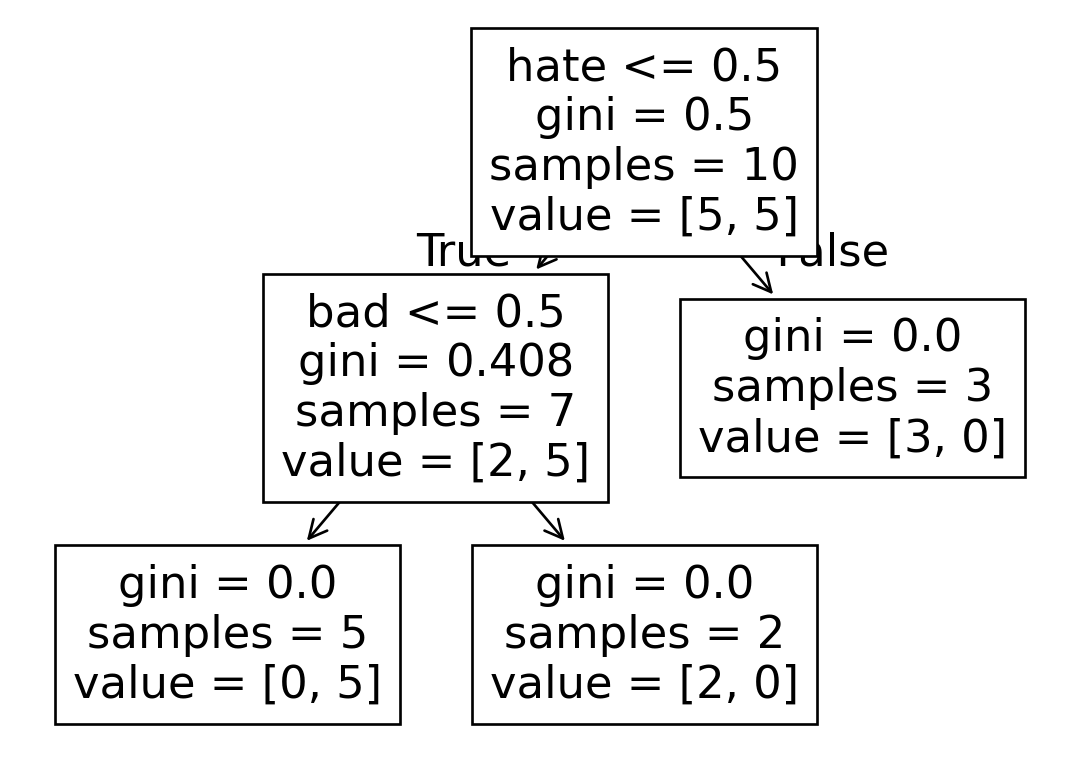

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = tmp_dt[vocabulary]
y = tmp_dt["sentiment"].values

classifier = DecisionTreeClassifier(random_state=123, max_leaf_nodes=3)
classifier.fit(X, y)
# print(unique_words)
print(classifier.classes_)

plot_tree(classifier, feature_names=X.columns)